In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers, models

In [2]:
data_dir = "archive/Car-Bike-Dataset"

In [3]:
batch_size = 32
img_size = (256,256)

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split = 0.2,
                                                            subset = "training",
                                                            seed = 100,
                                                            image_size=img_size,
                                                            batch_size=batch_size)


Found 3998 files belonging to 2 classes.
Using 3199 files for training.


In [5]:
val_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                          validation_split = 0.2,
                                                          subset = "validation",
                                                          seed = 100,
                                                          image_size = img_size,
                                                          batch_size = batch_size)

Found 3998 files belonging to 2 classes.
Using 799 files for validation.


In [6]:
class_names = val_dataset.class_names
print(class_names)

['Bike', 'Car']


In [7]:
normalization = layers.Rescaling(1./255)
train_ds = train_dataset.map(lambda x, y: (normalization(x), y))
val_ds = val_dataset.map(lambda x, y: (normalization(x), y))

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (256,256,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

c:\New folder\ok\Extra 2\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 736ms/step - accuracy: 0.6373 - loss: 0.6935 - val_accuracy: 0.9074 - val_loss: 0.2540
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 712ms/step - accuracy: 0.9044 - loss: 0.2364 - val_accuracy: 0.9186 - val_loss: 0.2032
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 696ms/step - accuracy: 0.9496 - loss: 0.1422 - val_accuracy: 0.9249 - val_loss: 0.1979
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 641ms/step - accuracy: 0.9556 - loss: 0.1186 - val_accuracy: 0.9262 - val_loss: 0.2587
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 639ms/step - accuracy: 0.9784 - loss: 0.0519 - val_accuracy: 0.9349 - val_loss: 0.2163
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 648ms/step - accuracy: 0.9896 - loss: 0.0288 - val_accuracy: 0.9349 - val_loss: 0.2459
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 645ms/step - accuracy: 0.9924 - loss: 0.0195 - val_accuracy: 0.9312 - val_loss: 0.2843
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 643ms/step - accuracy: 0.9877 - loss: 0

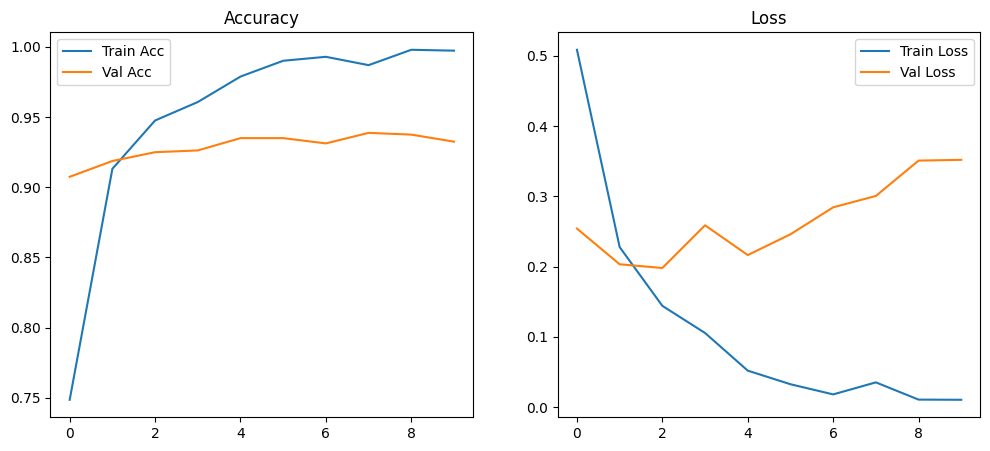

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

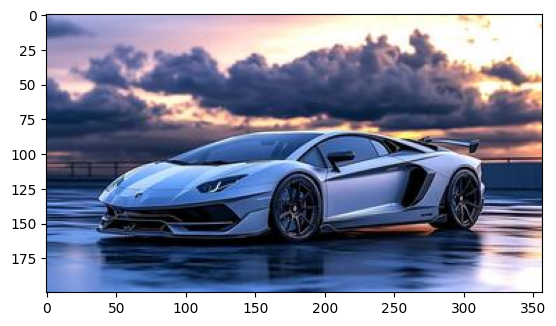

In [14]:
img = cv2.imread('test2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

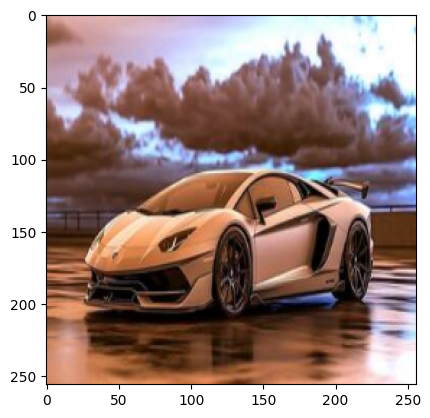

In [15]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [20]:
from tensorflow.keras.models import load_model
import numpy as np
model.save(os.path.join('models', 'binaryimageclassifiernewversionlive.h5'))

In [21]:
new_model = load_model(os.path.join('models', 'binaryimageclassifiernewversionlive.h5'))
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [22]:
if yhat < 0.5:
    print("predicted class is a bike")
else:
    print("predicted class is a car")

predicted class is a car
